In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import models
import Preprocessing_new as prep_t
import RootPreprocessing_new as rooprep
from sklearn import metrics

Welcome to JupyROOT 6.28/04


In [47]:
saved_model = models.load_model("/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/ultima_versione_buoni/tf_model_new/cams_model_new.keras")

In [48]:
weights = saved_model.get_weights()

In [4]:
train_ds,val_ds,test_ds,train_labels,val_labels,test_labels = prep_t.PrepareDataTraining("/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/sensors.root","/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/response.drdf")

In [5]:
train_ds, val_ds, test_ds, train_inner_ph, val_inner_ph, test_inner_ph = prep_t.SplitDataset("/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/sensors.root","/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/response.drdf")

In [49]:
#test_ds ha shape 4860,31,31
predictions = saved_model.predict(test_ds)

152/152 [==============================] - 0s 2ms/step


In [50]:
predictions = np.squeeze(predictions)

In [51]:
#approssimo i dati di predictions perchè mi servono così per fare la confusion matrix dopo
i = 0
predictions_approx = []
for value in predictions:
    value_approx = int(round(value, 0))
    # if value < 0.5:
    #     value_approx = 0 
    # else: value_approx = 1
    # i += 1
    predictions_approx.append(value_approx)

predictions_approx = np.asarray(predictions_approx)

In [9]:
file = prep_t.load_drdf("/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/response.drdf")
cam_list = prep_t.CamList("/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/response.drdf")

[[4437  353]
 [   9   61]]


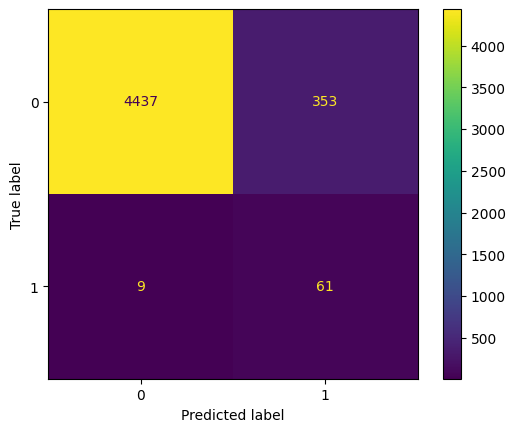

In [52]:
#test_labels ha shape 4860
cm = metrics.confusion_matrix(test_labels, predictions_approx)
print(cm)
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

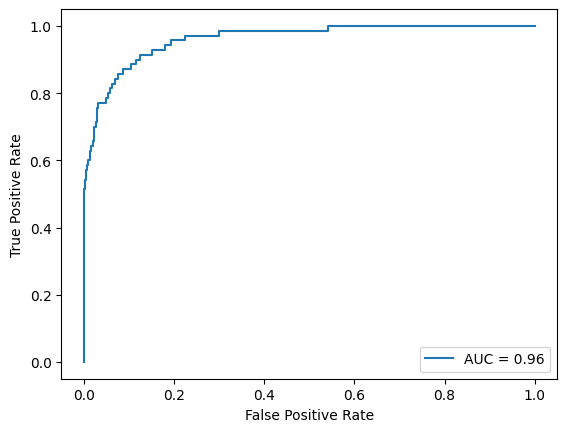

In [11]:
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predictions)
roc_auc = metrics.auc(fpr, tpr)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

In [25]:
mismatch_list = []
for i in range(len(test_ds)):
    #if test_labels[i] == 1 and predictions_approx[i] == 0:
    if test_labels[i] != predictions_approx[i]:
        mismatch_list.append(i)

fn_list = []
for i in range(len(test_ds)):
    if test_labels[i] == 1 and predictions_approx[i] == 0:
        fn_list.append(i)

In [26]:
fp_list = []
for i in range(len(test_ds)):
    if test_labels[i] == 0 and predictions_approx[i] == 1:
        fp_list.append(i)

In [ ]:
for i in fp_list: 
    plt.imshow(test_ds[i])
    plt.colorbar()
    plt.show()

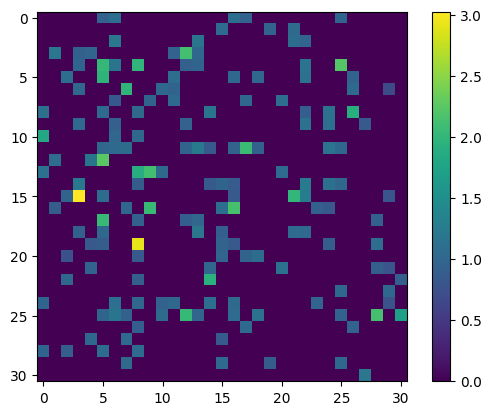

13


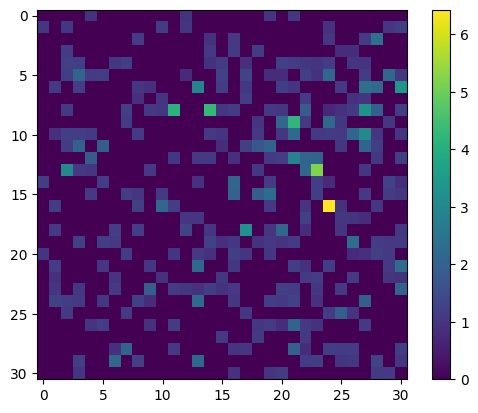

311


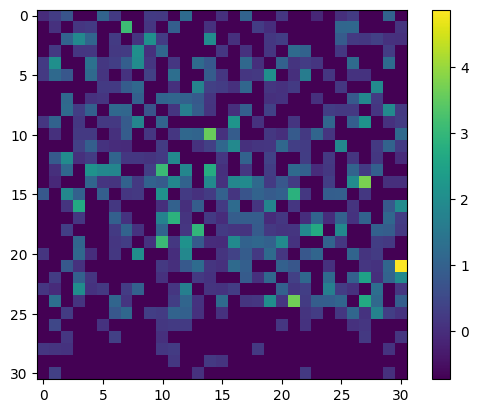

186


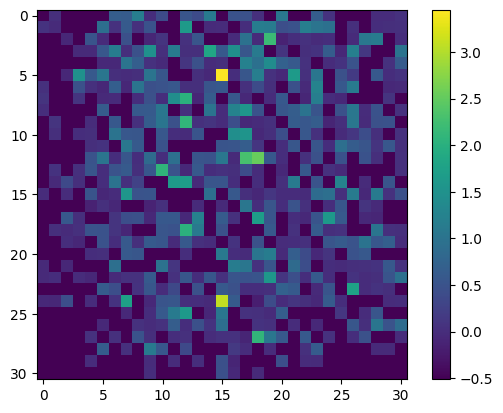

129


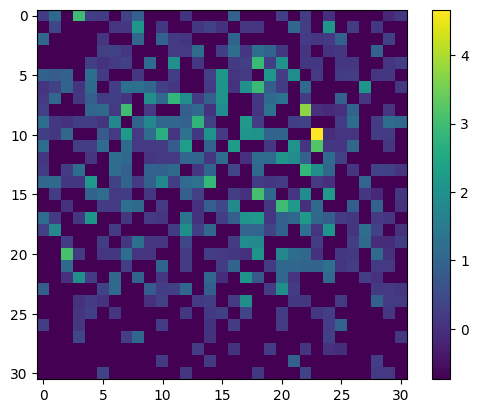

182


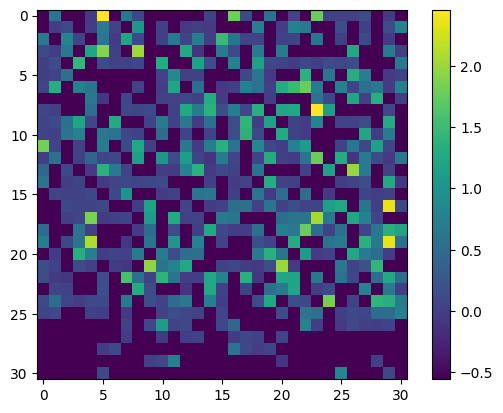

6


In [40]:
for i in fn_list:
    plt.imshow(test_ds[i])
    plt.colorbar()
    plt.show()
    print(test_inner_ph[i])

In [14]:
#calcolo i fotoni totali sulle camere predette male
tot_photons_all_wrong_cams = []
for i in mismatch_list:
    tot_photons_wrong_cam = abs(sum(map(sum,test_ds[i])))
    tot_photons_all_wrong_cams.append(tot_photons_wrong_cam)

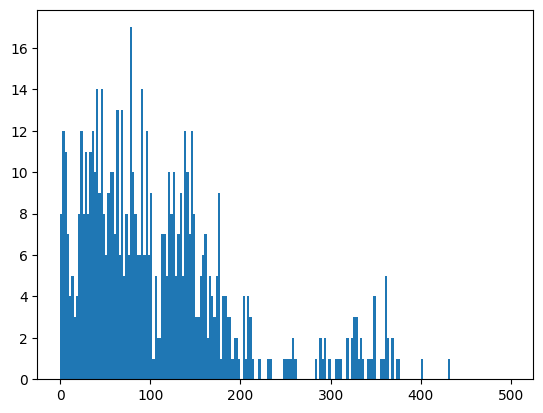

In [15]:
plt.hist(tot_photons_all_wrong_cams,bins=200,range=[0,500])
plt.show()